In [1]:
import tensorflow as tf

C:\Users\Rahul\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
x_data=np.linspace(0,10,1000000)

In [4]:
noise=np.random.randn(len(x_data))

In [8]:
y_true=(0.5*x_data)+5+noise

In [11]:
x_df=pd.DataFrame(data=x_data,columns=['X Data'])
y_df=pd.DataFrame(data=y_true,columns=['Y'])

In [24]:
my_data=pd.concat([x_df,y_df],axis=1)

In [25]:
my_data.head()

,X Data,Y
0,0.00000,4.387799
1,0.00001,2.326430
2,0.00002,5.556953
3,0.00003,4.979024
4,0.00004,4.322695


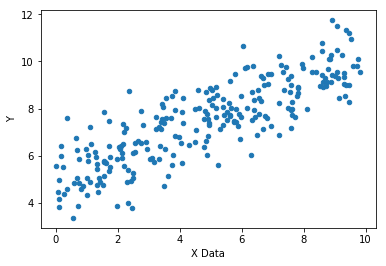

In [29]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y') #250 random sample

In [30]:
batch_size=8

In [31]:
np.random.randn(2)

array([0.37458461, 0.82897312])

In [32]:
m=-tf.Variable(0.37)
b=tf.Variable(0.82)

In [35]:
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])

In [36]:
y_model=m*xph+b

In [37]:
error=tf.reduce_sum(tf.square(yph-y_model))

In [38]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)

In [39]:
init=tf.global_variables_initializer()

In [40]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches=1000
    
    for i in range(batches):
        
        rand_ind=np.random.randint(len(x_data),size=batch_size)
        
        feed={xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b=sess.run([m,b])

In [41]:
model_m

0.5254991

In [42]:
model_b

4.923761

In [43]:
y_hat=x_data*model_m+model_b

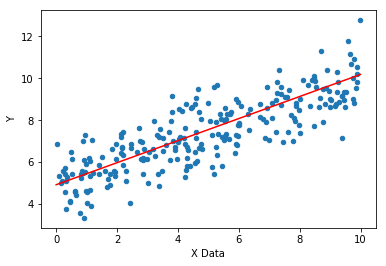

In [44]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')